<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/fin/flower/add_desne/Flower_decision_tree_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 30s 326ms/step - accuracy: 0.2435 - loss: 1.6099
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.4186 - loss: 1.3112
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4960 - loss: 1.2012
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5822 - loss: 1.0669
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5925 - loss: 1.0125
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6378 - loss: 0.9558
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6288 - loss: 0.8945
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6781 - loss: 0.7924
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7081 - loss: 0.7659
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7100 - loss: 0.7014


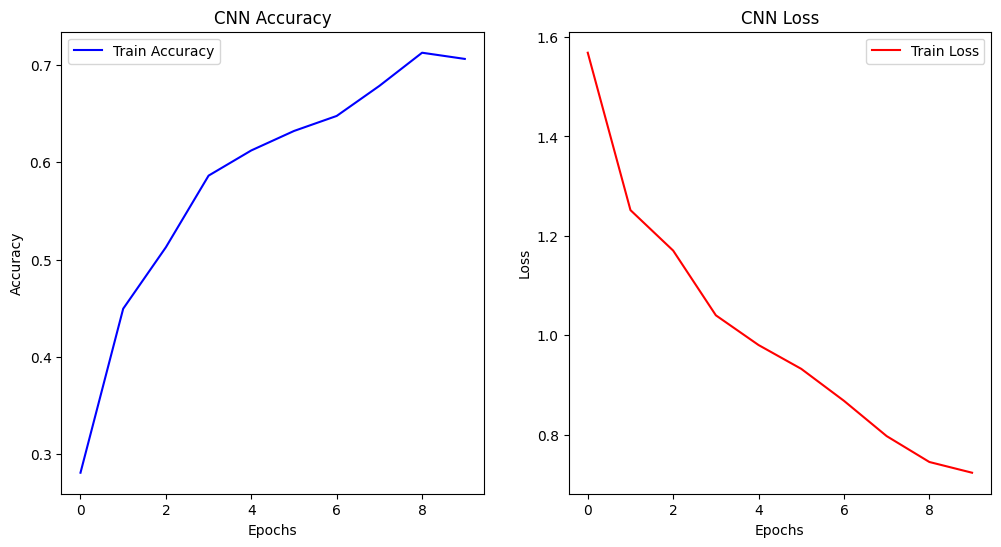

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Decision Tree Accuracy: 0.6424682395644283


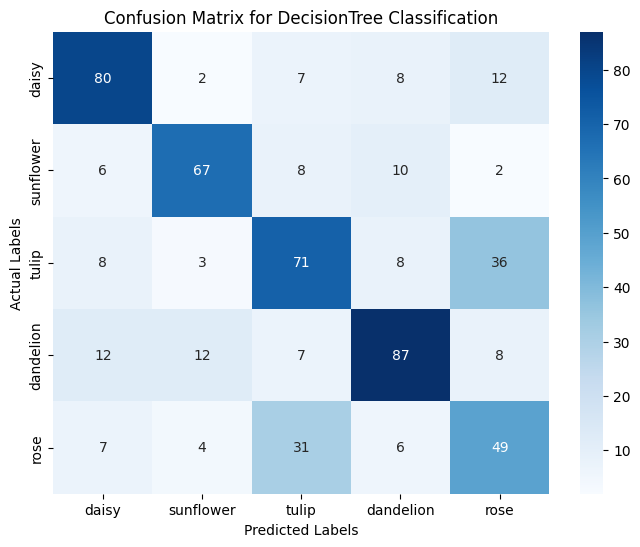

In [7]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 준비
IMAGE_SIZE = (128, 128)

def load_train_data(folder_path):
    X, y = [], []
    class_names = os.listdir(folder_path)
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            y.append(i)
    return np.array(X), np.array(y), class_names

def load_test_data(folder_path):
    X, filenames = [], []
    for image_name in os.listdir(folder_path):
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            filenames.append(image_name)
    return np.array(X), filenames

# Load training and testing data
train_folder = './flowers-dataset/train'
test_folder = './flowers-dataset/test'
X_train, y_train, class_names = load_train_data(train_folder)
X_test, test_filenames = load_test_data(test_folder)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize values
X_train = X_train / 255.0
X_test = X_test / 255.0

# 원핫 인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

# CNN 특성 추출기 정의 (Dense 레이어 추가)
cnn_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(len(class_names), activation='softmax')
])

# CNN 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN 모델 학습
history = cnn_model.fit(X_train, y_train, epochs=10)

# CNN 정확도, 손실 그래프
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss')

plt.show()

# CNN 특성 추출
X_train_features = cnn_model.predict(X_train)
X_test_features = cnn_model.predict(X_test)

# DecisionTree 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_features, y_train.argmax(axis=1))  # 원핫 인코딩에서 정수형 라벨로 변환하여 학습

# 검증 및 테스트 정확도 출력
y_test_pred = decision_tree.predict(X_test_features)
test_accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred)  # 원핫 인코딩에서 정수형 라벨로 변환하여 평가
print("Decision Tree Accuracy:", test_accuracy)

# 혼동 행렬 생성
conf_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for DecisionTree Classification')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 290ms/step - accuracy: 0.2938 - loss: 1.5390
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5041 - loss: 1.1652
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5459 - loss: 1.0922
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5581 - loss: 1.0590
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6099 - loss: 0.9560
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6329 - loss: 0.9083
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6666 - loss: 0.8323
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7074 - loss: 0.7299
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6959 - loss: 0.7578
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7407 - loss: 0.6633


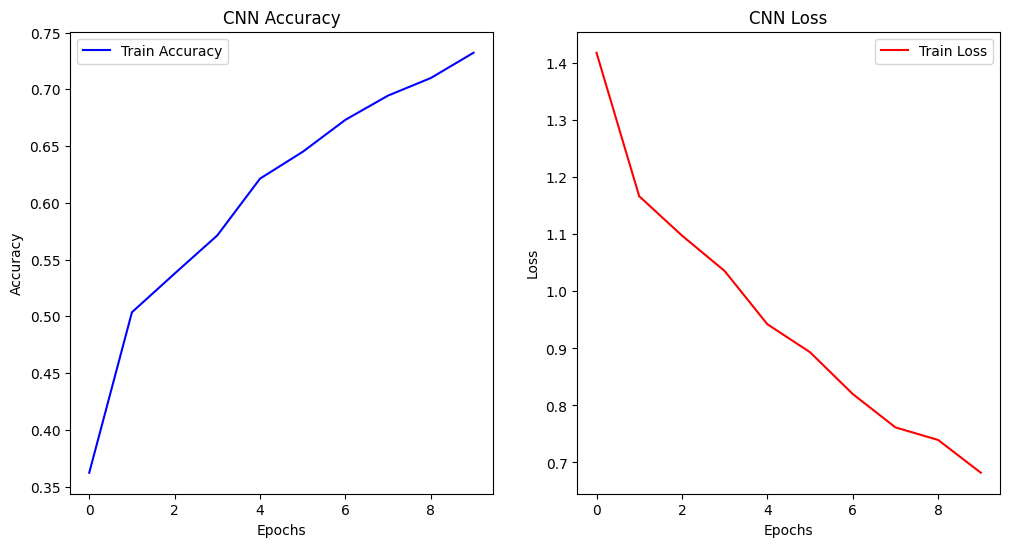

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Decision Tree Accuracy: 0.6388384754990926


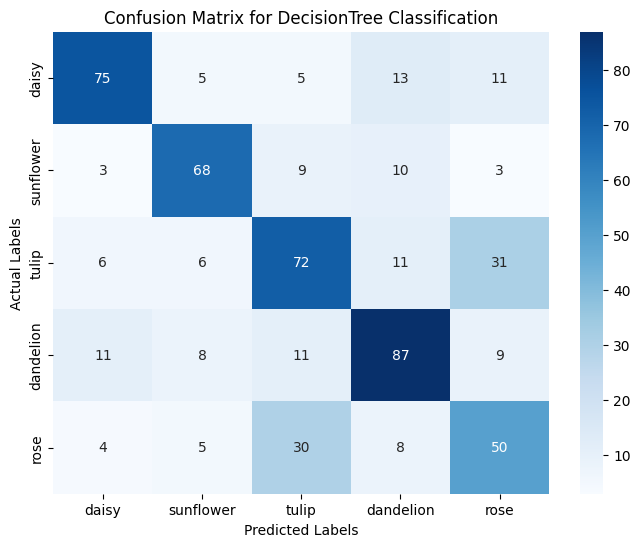

In [8]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 준비
IMAGE_SIZE = (128, 128)

def load_train_data(folder_path):
    X, y = [], []
    class_names = os.listdir(folder_path)
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            y.append(i)
    return np.array(X), np.array(y), class_names

def load_test_data(folder_path):
    X, filenames = [], []
    for image_name in os.listdir(folder_path):
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            filenames.append(image_name)
    return np.array(X), filenames

# Load training and testing data
train_folder = './flowers-dataset/train'
test_folder = './flowers-dataset/test'
X_train, y_train, class_names = load_train_data(train_folder)
X_test, test_filenames = load_test_data(test_folder)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize values
X_train = X_train / 255.0
X_test = X_test / 255.0

# 원핫 인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

# CNN 특성 추출기 정의 (Dense 레이어 추가)
cnn_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(len(class_names), activation='softmax')
])

# CNN 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN 모델 학습
history = cnn_model.fit(X_train, y_train, epochs=10)

# CNN 정확도, 손실 그래프
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss')

plt.show()

# CNN 특성 추출
X_train_features = cnn_model.predict(X_train)
X_test_features = cnn_model.predict(X_test)

# DecisionTree 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_features, y_train.argmax(axis=1))  # 원핫 인코딩에서 정수형 라벨로 변환하여 학습

# 검증 및 테스트 정확도 출력
y_test_pred = decision_tree.predict(X_test_features)
test_accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred)  # 원핫 인코딩에서 정수형 라벨로 변환하여 평가
print("Decision Tree Accuracy:", test_accuracy)

# 혼동 행렬 생성
conf_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for DecisionTree Classification')
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive
%cd MyDrive
%cd 인기초
%ls

/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/인기초
flowers-dataset/
